In [1]:
from __future__ import division
import numpy as np
import glob
import numexpr

In [7]:
data_type = 'BurnSample'
dataset = "RF"
name = data_type +'_'+dataset
print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3
outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

BurnSample_RF


In [3]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
preds_dtype = np.dtype(
    [     
        ('n1', np.float32),
        ('n2_1', np.float32),
        ('n2_2', np.float32),
        ('n2_3', np.float32),
        ('n3', np.float32)
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)
map_dtype = np.dtype(
    [
        ("id", id_dtype),
        ('raw', np.int32),
        ('st_raw', np.int32,(3)),
        ('pulses', np.int32),
        ('st_pulses', np.int32,(3)),
        ('cal', np.int32),
        ('st_cal', np.int32,(3)),
        ('hlc', np.int32),
        ('st_hlc', np.int32,(3)),
        ('slc', np.int32),
        ('st_slc', np.int32,(3))
    ]
)

particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
   #     ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
    #    ("llhratio", np.float32)
    ]
)
CWEIGHT_KEY = "CorsikaWeightMap"
weight_dtype = np.dtype(
        [
            ("AreaSum" ,np.float32),
            ("Atmosphere",np.float32),
            ("CylinderLength",np.float32),
            ("CylinderRadius" ,np.float32),
            ("DiplopiaWeight",np.float32),
            ("EnergyPrimaryMax",np.float32),
            ("EnergyPrimaryMin",np.float32),
            ("FluxSum",np.float32),
            ("Multiplicity",np.float32),
            ("NEvents",np.float32),
            ("OldWeight",np.float32),
            ("OverSampling",np.float32),
            ("Polygonato",np.float32),
            ("PrimaryEnergy",np.float32),
            ("PrimarySpectralIndex",np.float32),
            ("PrimaryType",np.int64),
            ("ThetaMax",np.float32),
            ("ThetaMin" ,np.float32),
            ("TimeScale",np.float32),
            ("Weight",np.float32)
]                            
    )    
info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("wf_times",np.float32,(N_Y_BINS, N_CHANNELS)),
        ("wf_pos",np.float32,(3, N_Y_BINS, N_CHANNELS)),
        ("wf_width",np.float32),
        ("qtot", np.float32),
        ("cog", np.float32,(3)),
        ("moi", np.float32),
        ("ti", np.float32,(4)),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("map", map_dtype),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("trck_reco", particle_dtype),
        ("cscd_reco", particle_dtype),
        ("logan_veto", veto_dtype),
        ("hese_old", hese_dtype),
        ("hese", hese_dtype),
        ("llhcut",np.float32),
        ("weight_val",np.float32)


    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("logan_veto", veto_dtype),
        ("hese", hese_dtype),
    ]
)

In [4]:
size = 0
#files_grabbed = glob.glob('/home/dup193/work/double_pulse/data/images_3str/BurnSample/*Run00128900*.npz')
files_grabbed = glob.glob('/home/dup193/work/double_pulse/data/BurnSample_RF/*.npz')
for file_name in files_grabbed:
    x = np.load(file_name, mmap_mode="r")['arr_0']
    size = size +len(x)
print(size)

12899


In [5]:
live_time = 1898429.5199999993
#live_time = 4995.69

In [6]:
import tensorflow as tf
import os

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model_1 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_2_1 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_20k_Qst_2000_Corsika_20904/vgg16_20k_QSt2000_corsika_20904.h5')
model_2_2 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_20k_Qst_2000_Corsika_20904_2/vgg16_20k_QSt2000_corsika_20904_2.h5')
model_2 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_30k_Qst_2000_Corsika_3/vgg16_30k_QSt2000_corsika_3.h5')
model_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_4/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')

mean_1 = 0.0012322452384978533 
std_1  = 0.009694634936749935
mean2_1 = 0.00025147481937892735
std2_1 = 0.005774625577032566
mean_2 = 0.0002565285249147564
std_2  = 0.005851939786225557
mean_3 = 0.00036459346301853657
std_3  = 0.007035365793853998

In [9]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
files_grabbed = glob.glob('/home/dup193/work/double_pulse/data/BurnSample_RF/*.npz')
#files_grabbed = glob.glob("/home/dup193/work/double_pulse/Data_TEST_124300_Level2pass2_IC86_2013_data_Run00124300_Subrun00000000_00000117_data.npz")
#files_grabbed = glob.glob("/home/dup193/work/double_pulse/Data_TEST_124300_Level2pass2_IC86_2013_data_Run00124300_Subrun00000000_00000117_data.npz")

for file_name in files_grabbed:
    x = np.load(file_name, mmap_mode="r")['arr_0']
    
    y = np.zeros(x.shape[0],dtype = save_dtype)
    im = (x['image']-mean_1)/std_1
    pred_n1 = model_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean2_1)/std2_1
    pred_n2_1 = model_2_1.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2_2 = model_2_2.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_2)/std_2
    pred_n2_3 = model_2.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
   
    for n,e in enumerate(x):    
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2_1','n2_2','n2_3','n3']] = (pred_n1[n],pred_n2_1[n],pred_n2_2[n],pred_n2_3[n],pred_n3[n])
        #print(e['id'],preds)
        y[["id","preds","qtot","qst","logan_veto","hese"]][n]\
        =(e['id'], preds,e["qtot"],e["qst"],e["logan_veto"],e["hese"])
    
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)    

BurnSample_RF
2339.5638048648834


In [69]:
data0= np.load('/fastio2/dasha/double_pulse/data_'+name+'.npy', mmap_mode='r')
#print(data0.shape, data0[0])
print(data0.shape[0],np.sqrt(data0.shape[0]))

14884 122.0


In [70]:
data1= np.load('/fastio2/dasha/double_pulse/data_BurnSample_90.npy', mmap_mode='r')
#print(data0.shape, data0[0])
print(data0.shape[0],np.sqrt(data0.shape[0]))

14884 122.0


In [8]:
N1 = 0.99
N3 = 0.8
masks0 = (data0['preds']['n3'] >= N3) & (data0['preds']['n1'] >= N1) 
masks1 = (data1['preds']['n3'] >= N3) & (data1['preds']['n1'] >= N1)
#masksC2 = (dataC2['preds']['n3'] >= N3) & (dataC2['preds']['n1'] >= N1)

In [9]:
print(data0[masks0]['id'],data0[masks0]['preds'])
print(data1[masks1]['id'],data1[masks1]['preds'])

[(124300, 0, 43013217, 0)] [(0.99971265, 0.03552169, 0.91290885)]
[(126000, 0, 21938287, 0) (124300, 0, 43013217, 0)
 (118400, 0, 25259437, 0) (126200, 0, 29870040, 0)] [(0.994747  , 0.0050303 , 0.8504003 ) (0.9995565 , 0.03368765, 0.96423566)
 (0.9970493 , 0.72018355, 0.8305911 ) (0.99732804, 0.00692627, 0.85150594)]


In [105]:
for n,i in enumerate(data0['id']):
    if i in data1[masks1]['id']:
        print(i,data0[n]['preds'])

(126000, 0, 21938287, 0) (0.927799, 0.02004894, 0.14687695)
(124300, 0, 43013217, 0) (0.99971265, 0.03552169, 0.91290885)
(118400, 0, 25259437, 0) (0.9845932, 0.29745802, 0.32461265)
(126200, 0, 29870040, 0) (0.95868504, 0.04802532, 0.14240126)


(array([], dtype=int64),)


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [13]:
#secs_per_year = 31536000
live_time = 1898429.5199999993
dataC= np.load('/fastio2/dasha/double_pulse/data_20904_corsika.npy', mmap_mode='r')
print(sum(dataC['weight_val']*live_time),np.sqrt(np.sum(np.square(dataC['weight_val']*live_time))))
print(sum(dataC['weight_val']*secs_per_year),np.sqrt(np.sum(np.square(dataC['weight_val']*secs_per_year))))

6171.238467533921 120.6464
102514.30272718822 2004.132927946839


In [25]:
live_time/60/60/24

0.057820486111111104

In [14]:
dataC2= np.load('/fastio2/dasha/double_pulse/dataCC_CNN_corsika.npy', mmap_mode='r')
print(sum(dataC2['weight_val']*live_time),np.sqrt(np.sum(np.square(dataC2['weight_val']*live_time))))
print(sum(dataC2['weight_val']*secs_per_year),np.sqrt(np.sum(np.square(dataC2['weight_val']*secs_per_year))))

6546.488219504033 52.578983
108747.81099571826 873.4223156284687


In [78]:
N1 = 0.99
N3 = 0.8
masks0 = (data0['preds']['n3'] >= N3) & (data0['preds']['n1'] >= N1) 
masksC = (dataC['preds']['n3'] >= N3) & (dataC['preds']['n1'] >= N1)
#masksC2 = (dataC2['preds']['n3'] >= N3) & (dataC2['preds']['n1'] >= N1)

In [79]:
print(sum(masks0),np.sqrt(sum(masks0)))

1 1.0


In [74]:
print(sum(dataC['weight_val'][masksC]*live_time),np.sqrt(np.sum(np.square(dataC['weight_val'][masksC]*live_time))))
print(sum(dataC['weight_val'][masksC]*secs_per_year),np.sqrt(np.sum(np.square(dataC['weight_val'][masksC]*secs_per_year))))

3.2082711557898063 0.4006498
53.29459935728485 6.655444175342196


In [75]:
print(sum(dataC2['weight_val'][masksC2]*live_time),np.sqrt(np.sum(np.square(dataC2['weight_val'][masksC2]*live_time))))
print(sum(dataC2['weight_val'][masksC2]*secs_per_year),np.sqrt(np.sum(np.square(dataC2['weight_val'][masksC2]*secs_per_year))))

NameError: name 'masksC2' is not defined

In [64]:
#Qs = 2000
#maskq0 = (data0['qst']['q'][:,0] >= Qs) 
#maskqC = (dataC['qst']['q'][:,0] >= Qs)

Qst0 = 1000
Qst1 = 10
Qst2 = 10
maskq0 = (data0['qst']['q'][:,1] >=Qst2) & (data0['qst']['q'][:,2] >=Qst1) & (data0['qst']['q'][:,0] >=Qst0)
maskqC = (dataC['qst']['q'][:,1] >=Qst2) & (dataC['qst']['q'][:,2] >=Qst1) & (dataC['qst']['q'][:,0] >=Qst0)

In [65]:
print(sum(maskq0),np.sqrt(sum(maskq0)))

2165 46.52956049652737


In [66]:
print(sum(dataC['weight_val'][maskqC]*live_time),np.sqrt(np.sum(np.square(dataC['weight_val'][maskqC]*live_time))))
print(sum(dataC['weight_val'][maskqC]*secs_per_year),np.sqrt(np.sum(np.square(dataC['weight_val'][maskqC]*secs_per_year))))

2089.552819591362 60.701664
34710.86901912348 1008.3532748413913


In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


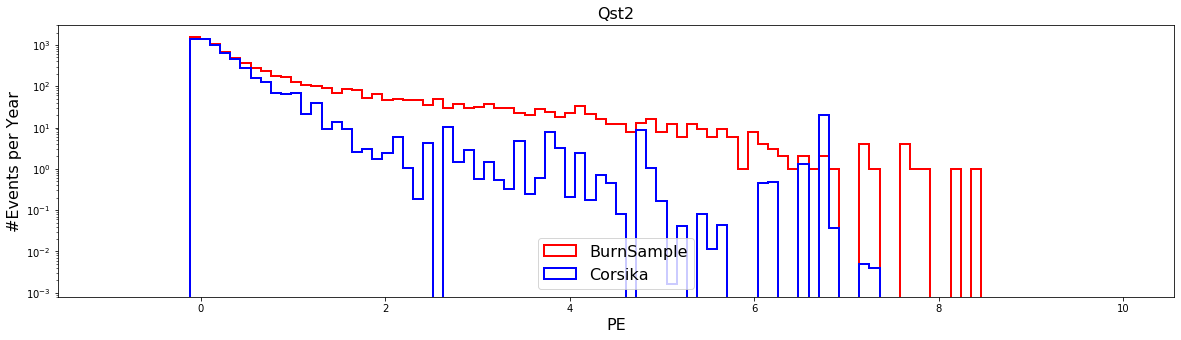

In [20]:
fig = plt.figure(figsize=(20, 5),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title('Qst2', fontsize = 16)
#ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
#ax.set_ylim(10**(-5),1.5*10**(4))
ax.set_xlabel('PE', fontsize = 16)                                                              
ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
n_bs, bins_bs, patches_bs = ax.hist(data0['logan_veto']['SPE_rlogl']-data0['logan_veto']['Cascade_rlogl'], histtype = 'step',edgecolor = 'r', 
        lw =2,  bins = 100, range=[-1,10], label = "BurnSample")  
n_c, bins_c, patches_c = ax.hist(dataC['logan_veto']['SPE_rlogl']-dataC['logan_veto']['Cascade_rlogl'], weights = dataC['weight_val']*live_time, histtype = 'step',edgecolor = 'b',
        lw =2,  bins = 100, range=[-1,10], label = "Corsika")  
plt.legend(loc=8)

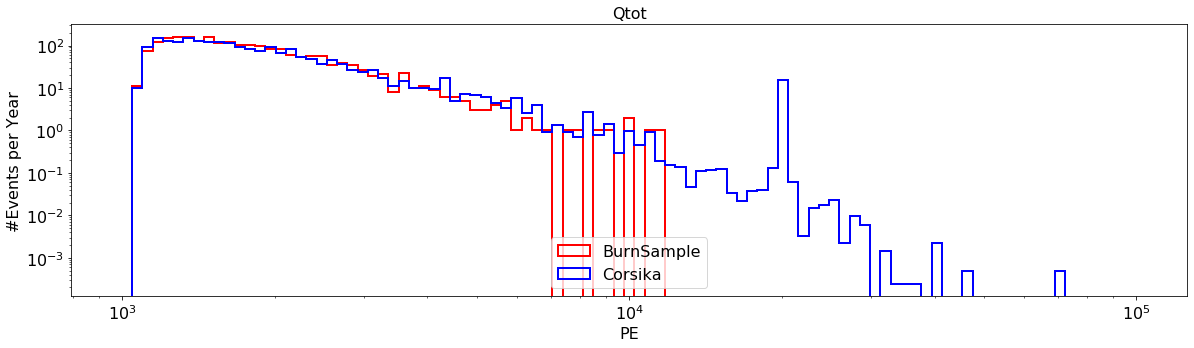

In [67]:
fig = plt.figure(figsize=(20, 5),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Qtot', fontsize = 16)
#ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
#ax.set_ylim(10**(-5),1.5*10**(4))
ax.set_xlabel('PE', fontsize = 16)                                                              
ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
n_bs, bins_bs, patches_bs = ax.hist(data0['qtot'][maskq0], histtype = 'step',edgecolor = 'r', 
        lw =2,  bins = np.logspace(np.log10(1000),np.log10(100000),100), range=[1000,1000000], label = "BurnSample")  
n_c, bins_c, patches_c = ax.hist(dataC['qtot'][maskqC], weights = dataC['weight_val'][maskqC]*live_time, histtype = 'step',edgecolor = 'b',
        lw =2,  bins = np.logspace(np.log10(1000),np.log10(100000),100), range=[1000,1000000], label = "Corsika")  
plt.legend(loc=8)

In [58]:
print(min(data0['qst']['q'][:,1]))

0.2103385


In [59]:
ns = []
for n,i in enumerate(n_c):
    n = n_bs[n]/i
    if np.isnan(n):
        n=0
    ns.append(n)
print(ns)

[1.2839373254685797, 1.1809917128906513, 1.2079283628857809, 1.2688907892771317, 1.2671436343822793, 1.4911100745106562, 1.1639670360897982, 1.066524903102615, 1.427544269256848, 1.0594470229460515, 1.0752710446940243, 1.2502729571650963, 1.4141725152818656, 1.3101221960942266, 0.9815252848507335, 1.3522852195658206, 0.7776007878523608, 1.0889676303046945, 1.2132465766728173, 1.5987821776381272, 0.8566259894803986, 1.0203080957063257, 1.2478629415243454, 1.1969849651336208, 0.7712226087580246, 1.2646588261711624, 0.7060699433299575, 1.5223164509916545, 1.0024719156122275, 1.0753478603307955, 0.9418257070590941, 0.35549898019701726, 1.1940530560684093, 0.6970965655740495, 0.6000585994726048, 0.4970672707414749, 0.914949461104596, 1.8024202420242024, 0.1760357572631941, 0.7807109501572477, 0.24795689811731944, 1.0778947368421052, 0.0, 1.086472148541114, 1.393671316774413, 0.0, 1.284415177171527, 0.7095097869391997, 0.0, 2.040857000498256, 0.0, 1.0804537061461357, 5.1136079900124844, 0.0,

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


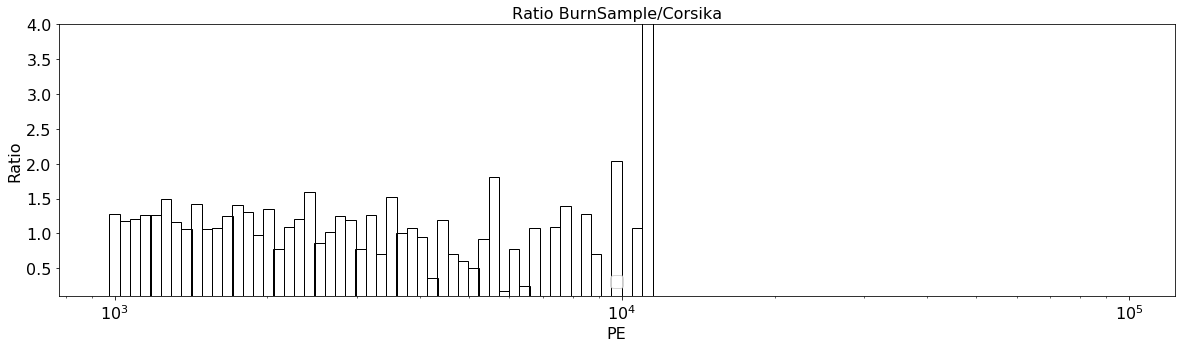

In [68]:
fig = plt.figure(figsize=(20, 5),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
ax.set_ylim(10**(-1),4*10**(0))
ax.set_xlabel('PE', fontsize = 16)                                                              
ax.set_ylabel("Ratio", fontsize = 16) 
#left_edges = bins_all[:-1]
#print(left_edges)
#width = (left_edges[1] - left_edges[0])
plt.bar(bins_bs[:-1],ns,np.diff(bins_bs), fill =False)
#plt.bar(bins_all, ns, align='edge')
plt.legend(loc=8)

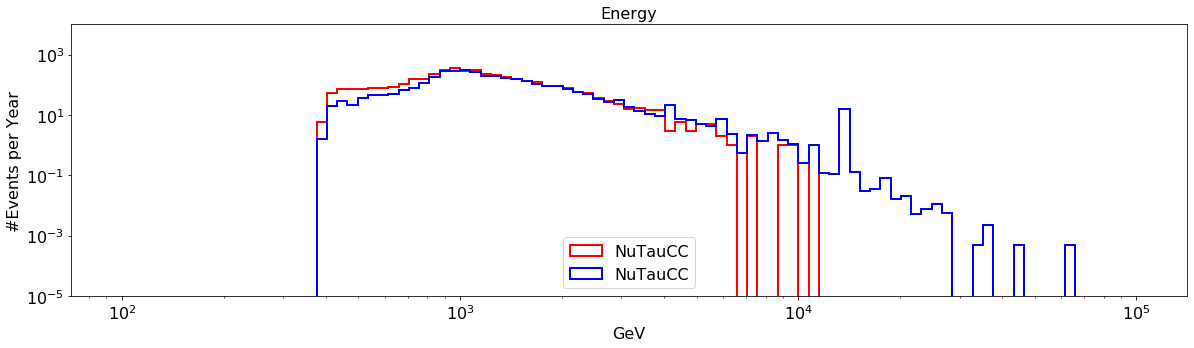

In [63]:
fig = plt.figure(figsize=(20, 5),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Energy', fontsize = 16)
#ax.text(0.01,0.95,'#NuTauCC '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_ylim(10**(-5),10**(4))
ax.set_xlabel('GeV', fontsize = 16)                                                              
ax.set_ylabel("#Events per Year", fontsize = 16)                                                   
#ax.hist(dataC['primary']['energy'], histtype = 'step',edgecolor = 'r', 
#       lw =2,  bins = np.logspace(np.log10(100),np.log10(10000000000),100), range=[1000,100000000], label = "NuTauCC")  
ax.hist(data0['qst']['q'][:,0][maskq0], histtype = 'step',edgecolor = 'r', 
        lw =2,  bins = np.logspace(np.log10(100),np.log10(100000),100), range=[1000,100000000], label = "NuTauCC")  
ax.hist(dataC['qst']['q'][:,0][maskqC], weights = dataC['weight_val'][maskqC]*live_time, histtype = 'step',edgecolor = 'b',
        lw =2,  bins = np.logspace(np.log10(100),np.log10(100000),100), range=[1000,100000000], label = "NuTauCC")  
#ax.hist(data0['qtot'], histtype = 'step',edgecolor = 'r', 
#        lw =2,  bins = np.logspace(np.log10(100),np.log10(100000),100), range=[1000,100000000], label = "NuTauCC")  
#ax.hist(dataC['qtot'], weights = dataC['weight_val']*live_time, histtype = 'step',edgecolor = 'b',
#        lw =2,  bins = np.logspace(np.log10(100),np.log10(100000),100), range=[1000,100000000], label = "NuTauCC")  
plt.legend(loc=8)

BurnSample_10_2
/home/dup193/work/double_pulse/data/BurnSample_2/Images_BurnSample_126000_0009_Level2pass2_IC86_2014_data_Run00126000_Subrun00000000_00000099_data.npz
[(126000, 0, 21938287, 0)] [[1273.4089   227.31744  101.82237]] 0.54885054 0.2204586 0.07937974
/home/dup193/work/double_pulse/data/BurnSample_2/Images_BurnSample_124300_0011_Level2pass2_IC86_2013_data_Run00124300_Subrun00000000_00000117_data.npz
[(124300, 0, 43013217, 0)] [[2092.7935   149.21861  133.31442]] 2.234664 0.08059845 0.105677225
/home/dup193/work/double_pulse/data/BurnSample_2/Images_BurnSample_118400_0006_Level2pass2_IC86_2011_data_Run00118400_Subrun00000000_00000063_data.npz
[(118400, 0, 25259437, 0)] [[1149.0962   343.80463  171.15054]] 0.67607546 0.2413806 0.10996244
/home/dup193/work/double_pulse/data/BurnSample_2/Images_BurnSample_126200_0013_Level2pass2_IC86_2014_data_Run00126200_Subrun00000000_00000135_data.npz
[(126200, 0, 29870040, 0)] [[691.7326   88.72177  69.54794]] 0.35323015 0.032564785 0.033239

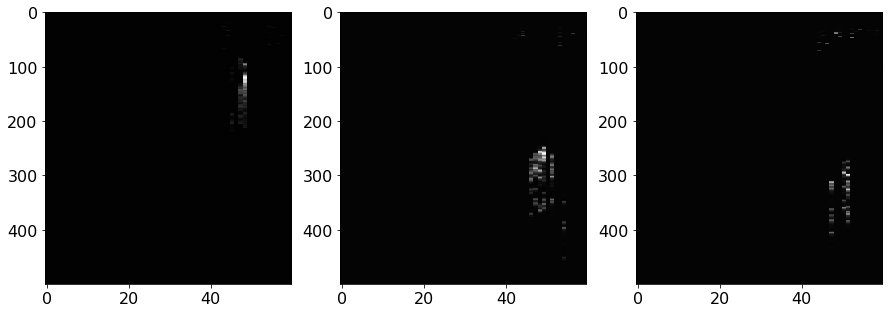

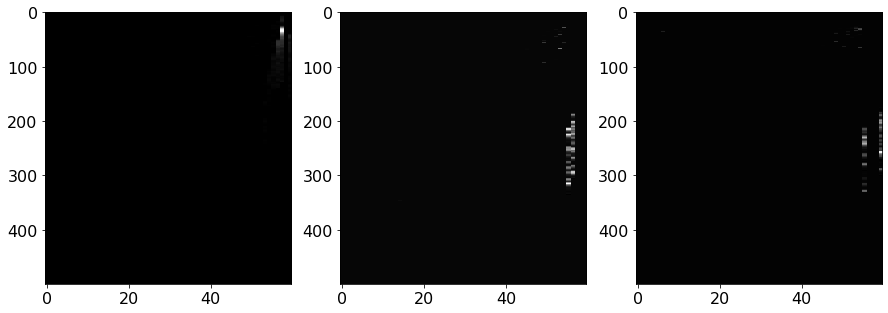

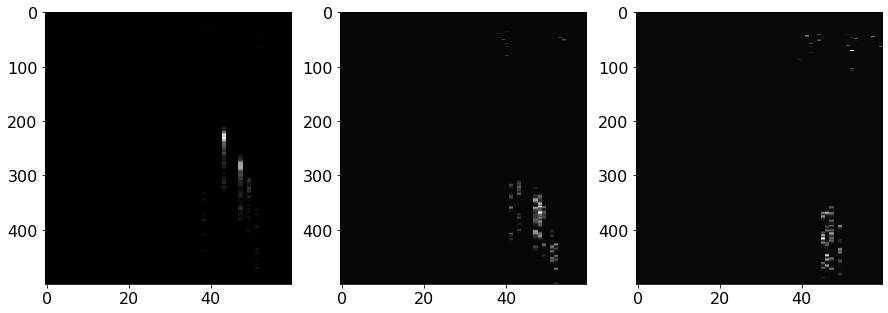

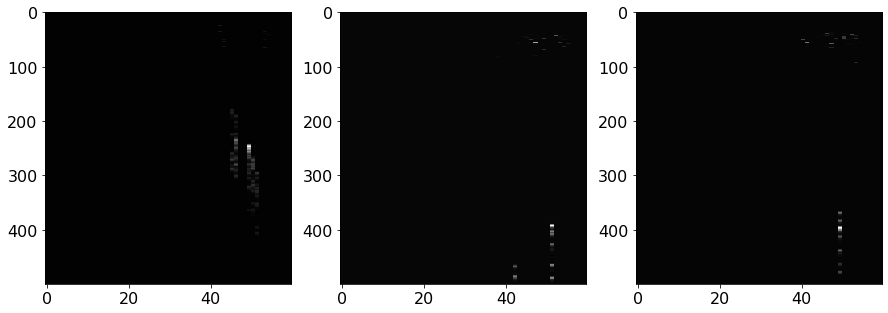

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
#print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/BurnSample_2/*.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    #print(file_name, x.shape)
    for n,e in enumerate(x):
        if e['id'] in data1['id'][masks1]:
            print(file_name)
            print(e['id'],e['qst']['q'],np.sum(e['image'][0][:,:,0]),np.sum(e['image'][0][:,:,1]),np.sum(e['image'][0][:,:,2]))
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

BurnSample_10_2
[(126000, 0, 21938287, 0)] [[1273.4089   227.31744  101.82237]] 0.5399479 0.2152434 0.06971351
[(124300, 0, 43013217, 0)] [[2092.7935   149.21861  133.31442]] 2.2309463 0.07728326 0.10008523
[(118400, 0, 25259437, 0)] [[1149.0962   343.80463  171.15054]] 0.6715037 0.2467791 0.100943156
[(126200, 0, 29870040, 0)] [[691.7326   88.72177  69.54794]] 0.34391248 0.028822232 0.023536948
8.531105518341064


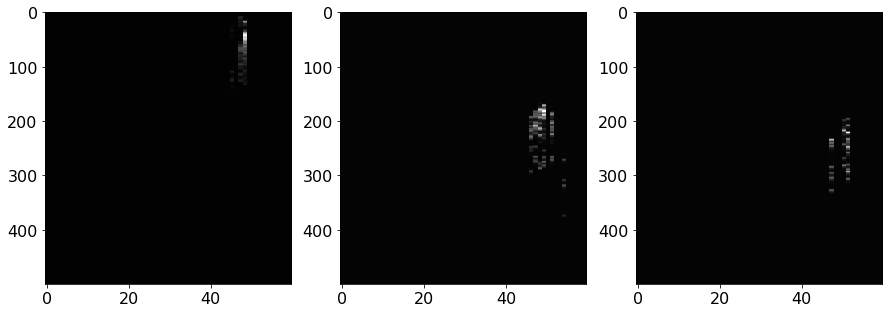

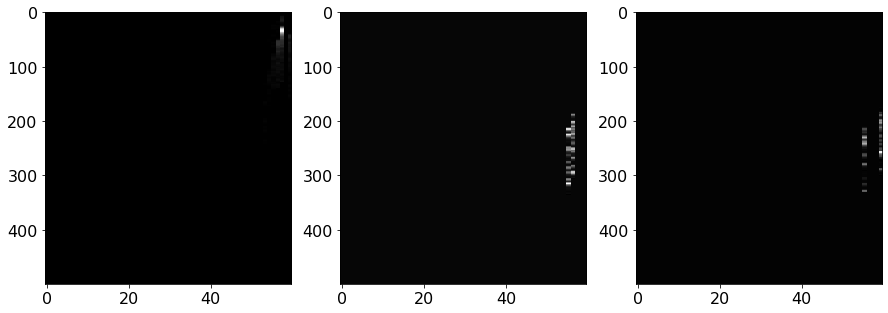

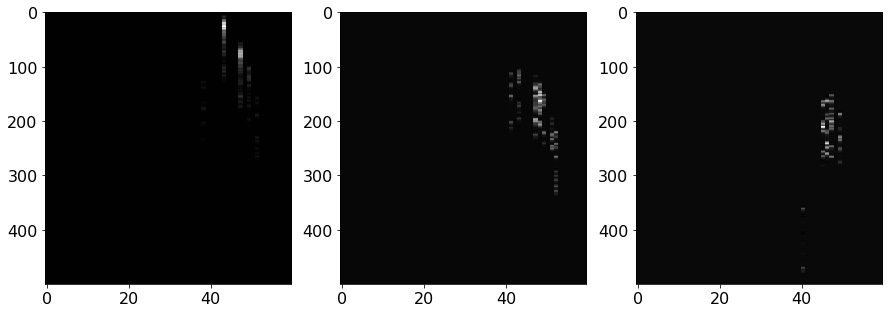

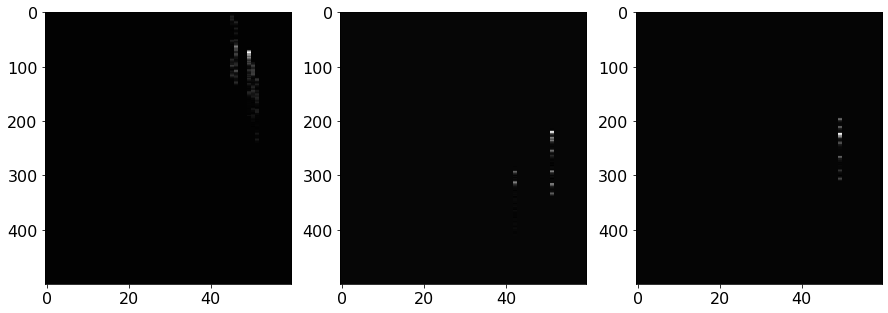

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
#print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/BurnSample/*.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    #print(file_name, x.shape)
    for n,e in enumerate(x):
        if e['id'] in data1['id'][masks1]:
            print(e['id'],e['qst']['q'],np.sum(e['image'][0][:,:,0]),np.sum(e['image'][0][:,:,1]),np.sum(e['image'][0][:,:,2]))
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)